In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.ensemble import IsolationForest

In [2]:
rng = np.random.RandomState(42)
# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])
# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

In [4]:
X_train.shape , X_outliers.shape

((2000, 2), (50, 2))

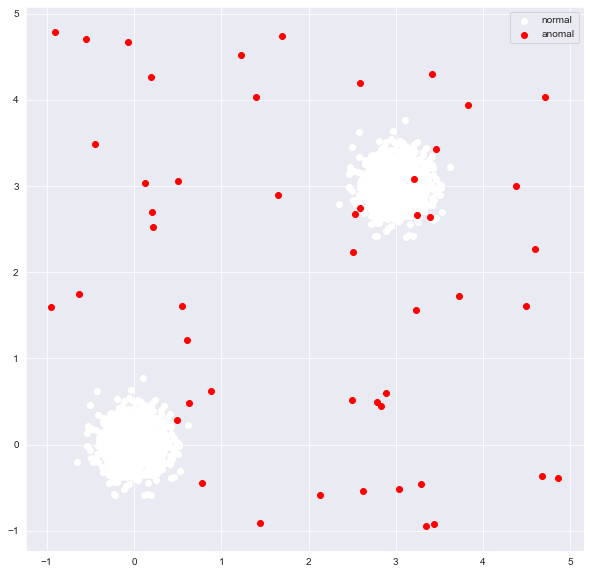

In [11]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(X_train['x1'],X_train['x2'],c='white',label='normal')
ax.scatter(X_outliers['x1'],X_outliers['x2'],c='red',label='anomal')
ax.legend()